In [1]:
import numpy
from urllib.request import urlopen
import scipy.optimize
import random
from sklearn import svm
from sklearn import linear_model
import sklearn

In [2]:
import pandas as pd
import os

In [3]:
for filename in os.listdir('data'):
    print(filename)

2year.arff
3year.arff
5year.arff
4year.arff
1year.arff


###
### Question 1
###


In [4]:
f = open("data/5year.arff", 'r')

while not '@data' in f.readline():
    pass
    

In [5]:
dataset = []
for l in f:
    if '?' in l: # Missing entry
        continue
    l = l.split(',')
    
    values = [1] + [float(x) for x in l]
    values[-1] = values[-1] > 0 # Convert to bool
    dataset.append(values)


In [6]:
X = [d[:-1] for d in dataset]
Y = [d[-1] for d in dataset]

In [7]:
mod=linear_model.LogisticRegression(C=1.0)

In [8]:
mod.fit(X,Y)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
pred=mod.predict(X)

In [10]:
pred

array([False, False, False, ..., False, False, False])

In [11]:
sum(pred==Y)/len(Y)

0.9663477400197954

###
#### accuracy=0.966
###

In [17]:
TP=sum(numpy.logical_and(pred, Y))
FP=sum(numpy.logical_and(pred, numpy.logical_not(Y)))
TN=sum(numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(Y)))
FN=sum(numpy.logical_and(numpy.logical_not(pred), Y))
print(TP)
print(FP)
print(TN)

4
4
2925


In [13]:
BER=1 - 0.5 * (TP / (TP + FN) + TN / (TN + FP))

In [14]:
BER

0.4810749837661251

###
#### BER=0.48
###

###
### Question 2
###

In [31]:
mod2=linear_model.LogisticRegression(C=1.0, class_weight='balanced')

In [32]:
mod2.fit(X, Y)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
pred2=mod2.predict(X)

In [34]:
sum(pred2==Y)/len(Y)

0.7786209171890465

###
#### accuracy=0.7786
###

In [35]:
TP=sum(numpy.logical_and(pred2, Y))
FP=sum(numpy.logical_and(pred2, numpy.logical_not(Y)))
TN=sum(numpy.logical_and(numpy.logical_not(pred2), numpy.logical_not(Y)))
FN=sum(numpy.logical_and(numpy.logical_not(pred2), Y))

In [36]:
1-0.5*(TP/(TP+FN)+TN/(TN+FP))

0.21390054826983718

###
#### BER=0.2139
###

###
### Question 3
###

In [37]:
# Shuffle the data
shuffled=(list(zip(X, Y)))
random.shuffle(shuffled)

In [38]:
X_s=[i[0] for i in shuffled]
Y_s=[i[1] for i in shuffled]

In [39]:
N=len(Y_s)
Xs_train, Xs_val, Xs_test=X_s[:int(N*0.5)], X_s[int(N*0.5):int(N*0.75)],X_s[int(N*0.75):] 
Ys_train, Ys_val, Ys_test=Y_s[:int(N*0.5)], Y_s[int(N*0.5):int(N*0.75)],Y_s[int(N*0.75):] 



In [40]:
mod3=mod2.fit(Xs_train, Ys_train)
ls_x=[Xs_train, Xs_val, Xs_test]
ls_y=[Ys_train, Ys_val, Ys_test]
def BER(pred, Y):
    TP=sum(numpy.logical_and(pred, Y))
    FP=sum(numpy.logical_and(pred, numpy.logical_not(Y)))
    TN=sum(numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(Y)))
    FN=sum(numpy.logical_and(numpy.logical_not(pred), Y))
    BER=1-0.5*(TP/(TP+FN)+TN/(TN+FP))
    return BER

for i in range(3):
    pred=mod3.predict(ls_x[i])
    accuracy=sum(pred==ls_y[i])/len(pred)
    print(accuracy)
    print(BER(pred, ls_y[i]))
    


def Ber2(X, Y, num_c):
    for i in range(len(X)):
        return i
        
    

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7742574257425743
0.21000288787813148
0.737467018469657
0.2902864938608458
0.7361477572559367
0.20846883468834687


### 
#### accuracy for train, validation and test are 0.8072, 0.7981, 0.8100
#### BER for train, validation and test are 0.6103, 0.7054, 0.6336
###

### 
### Question 4
###


In [41]:
ls_BER=[]
ls_x=[Xs_train, Xs_val, Xs_test]
ls_y=[Ys_train, Ys_val, Ys_test]
for n in range(-4, 5,1):
    mod=linear_model.LogisticRegression(C=10**n, class_weight="balanced")
    mod.fit(ls_x[0], ls_y[0])
    ls=[]
    for i in range(3):
        pred=mod.predict(ls_x[i])
        ber=BER(pred, ls_y[i])
        ls.append(ber)
    ls_BER.append(ls)

    
        
        
        
    

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Convergen

In [42]:
ls_BER

[[0.23675185907154717, 0.3032469304229195, 0.2037940379403793],
 [0.22729405819074433, 0.32733969986357436, 0.20243902439024386],
 [0.2242076384376579, 0.3232469304229195, 0.20040650406504068],
 [0.22249296079705438, 0.3218826739427012, 0.1983739837398374],
 [0.21000288787813148, 0.2902864938608458, 0.20846883468834687],
 [0.21906360551584725, 0.31778990450204636, 0.19701897018970183],
 [0.21872066998772643, 0.31778990450204636, 0.19566395663956637],
 [0.21151902389719157, 0.31506139154160984, 0.19430894308943092],
 [0.2139195725940366, 0.3171077762619372, 0.19566395663956637]]

In [43]:
import matplotlib.pyplot as plt

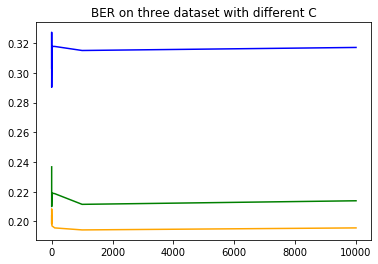

In [44]:
c=[10**n for n in range(-4, 5)]

ber_train=[x[0] for x in ls_BER]
ber_valid=[x[1] for x in ls_BER]
ber_test=[x[2] for x in ls_BER]
plt.plot(c, ber_train,color='g', label='train')
plt.plot(c, ber_valid, color='blue',label='valid')
plt.plot(c, ber_test, color='orange',label='test')
plt.title("BER on three dataset with different C")
plt.show()


###
#### Since the larger BER is, the larger error rate on average. When C=10^3, BER is the smallest. Therefore, I will choose select the 8th classifier
###

###
### Question 5
###

In [46]:
def Fb(pred, Y, b):
    TP=sum(numpy.logical_and(pred, Y))
    FP=sum(numpy.logical_and(pred, numpy.logical_not(Y)))
    TN=sum(numpy.logical_and(numpy.logical_not(pred), numpy.logical_not(Y)))
    FN=sum(numpy.logical_and(numpy.logical_not(pred), Y))
    fb=(1+b**2)*TP/((1+b**2)*TP+(b**2)*FN+FP)
    return fb

In [47]:
mod=linear_model.LogisticRegression(C=1, class_weight="balanced")
mod.fit(Xs_test, Ys_test)
pred=mod.predict(Xs_test)
ls_fb=[]
for b in [0.1, 1, 10]:
    fb=Fb(pred, Ys_test, b)
    ls_fb.append(fb)
   

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [48]:
ls_fb

[0.14520766773162938, 0.2482758620689655, 0.8555294117647059]

In [49]:
import numpy
from urllib.request import urlopen
import scipy.optimize
import random
from sklearn.decomposition import PCA
from collections import defaultdict

###
### Question 1
###

In [50]:
pca=PCA()
pca.fit(Xs_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
print(pca.components_[0])

[-4.96368974e-19  2.18243884e-07 -9.99039922e-07  1.12654761e-06
  3.52061405e-06  2.56836874e-03  7.48059669e-07  2.50637788e-07
  4.91080172e-06 -6.34697992e-07  9.35262806e-07  1.93909898e-07
  1.01800281e-06 -6.31754545e-06  2.50221436e-07  6.76904777e-03
  1.10030561e-06  5.41136705e-06  9.71932774e-08  2.19859373e-07
  4.65917150e-06 -6.47922708e-09  1.72433904e-07  1.90620180e-07
  6.49624570e-07  1.23337587e-06  9.61598907e-07 -9.12059026e-05
  2.06637375e-06  4.29639462e-06 -1.41680418e-06  1.97154819e-07
 -4.27985161e-04  6.44971385e-06 -2.37506890e-06  1.42315768e-07
 -2.47388047e-07  6.93592788e-03  7.96730861e-07  1.17328487e-07
  1.38734879e-06 -2.04250153e-06  4.00937408e-08  5.25625467e-06
  5.95618917e-07 -3.86509140e-06  2.52991584e-06 -8.44990269e-05
  2.04760672e-07  1.76723956e-07  3.67239066e-06 -7.99118889e-07
 -1.16201857e-06 -5.07982142e-06  2.04656491e-06  9.99949583e-01
  8.55257804e-08  2.99509655e-07 -1.90227690e-07  2.13223673e-06
 -2.04327701e-04 -1.50455

###
### Question 2
###

In [52]:
ls_x=[Xs_train, Xs_val, Xs_test]
ls_y=[Ys_train, Ys_val, Ys_test]
ls=[]
model=sklearn.linear_model.LogisticRegression(C=1, class_weight='balanced')
for n in range(5, 31, 5):
    pca=PCA(n_components=n)
    pca.fit(Xs_train)
    Xpca_train = numpy.matmul(Xs_train, pca.components_.T)
    model.fit(Xpca_train, Ys_train)
    Xpca_valid = numpy.matmul(Xs_val, pca.components_.T)
    pred_v=model.predict(Xpca_valid)
    ber_v=BER(pred_v, Ys_val)
    Xpca_test = numpy.matmul(Xs_test, pca.components_.T)
    pred_t=model.predict(Xpca_test)
    ber_t=BER(pred_t, Ys_test)
    ls_ber=[ber_v, ber_t]
    ls.append(ls_ber)
    
    
    
    

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", Converg

In [53]:
ls

[[0.3839290586630286, 0.3369241192411925],
 [0.3634652114597544, 0.35304878048780486],
 [0.327094133697135, 0.2590785907859079],
 [0.2889222373806275, 0.21659891598915992],
 [0.30870395634379255, 0.20176151761517613],
 [0.32938608458390184, 0.2037940379403793]]